# #K_mean cluster Algorithm

In [69]:
import pandas as pd
import numpy as np

In [70]:
players=pd.read_csv("players_22.csv")

C:\Users\sarav\AppData\Local\Temp\ipykernel_29284\165077096.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv("players_22.csv")


In [71]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [72]:
players.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [9]:
#reducing the colunmns for simplicity

In [105]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [13]:
#drop the column which has null or missing values(most cluster algorithm wont work this misssing data)

In [106]:
players = players.dropna(subset=features)

In [14]:
#copying data to new dataframe where we do clustering

In [107]:
data = players[features].copy()

In [108]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [21]:
#now we can startimplementing k-mean clusters

In [22]:
#steps
#1-->scale(rescale that no column dominate other)
#2-->initialze randam centriod
#3-->lable each data points
#4-->update centriods
#5-->repeat step 3 and 4 until centriods stop changing

# #scaling

In [ ]:
#using min()and max() to scale all from 0 to 1,and everying to 1 to 10 scale

In [109]:
#data=((data-data.min())  /  (data.max() - data.min()))*9+1
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1      

In [110]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [29]:
#it clear min is 1,max is 11,all scaling between 1 to 10 ,so domination between column

In [28]:
#lets see first fews rows of our data

In [111]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [31]:
#initate random centriod

In [33]:
#centriod=data.apply(lambda x:float (x.sample()))

In [34]:
#centriod

overall      1.391304
potential    5.108696
wage_eur     1.007725
value_eur    1.064534
age          5.000000
dtype: float64

In [117]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [118]:
centroids = random_centroids(data, 5)

In [119]:
centroids

,0,1,2,3,4
overall,3.391304,4.478261,5.347826,5.347826,5.130435
potential,8.173913,5.130435,4.478261,6.869565,4.695652
wage_eur,1.214592,2.301860,1.214592,1.008584,1.071531
value_eur,1.038198,1.017578,1.360378,1.030465,1.076859
age,1.740741,4.703704,6.925926,3.592593,3.222222


In [44]:
#so each column is centroids,and rows is features

# #lable each data acc to cluster

In [ ]:
#calculate distance formula from geometric

In [54]:
"""def get_labels(data,centriods):
    distances=centroids.apply (lambda x :np.sqrt(((data - x)**2) .sum(axis=1)))#finding distance between each datapt and centriods
    return distance.idxmin(axis=1)#to keep which people in cluster(find index of min value)(cluster assignments)
    """

In [ ]:
"""
def get_labels(data,centriods):
    distances=centroids.apply (lambda x :np.sqrt(((data - x)**2) .sum(axis=1)))
    return distance.idxmin(axis=1)
    
    
    """

In [120]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [56]:
#getting lables

In [121]:
labels = get_labels(data, centroids)

In [122]:
labels

0        1
1        3
2        2
3        3
4        1
        ..
19234    4
19235    4
19236    4
19237    4
19238    4
Length: 19165, dtype: int64

In [60]:
#to chk how many players are there in each cluster

In [127]:
labels.value_counts()

3    6436
2    5081
4    4060
1    2028
0    1560
dtype: int64

# #update cluster
based on who's  in the cluster

In [ ]:
#find out all the player in the cluster and take geometric means of each features(cluster centriods)

In [96]:
"""def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x :np.exp(np.log(x).mean().T))
    
    """

In [128]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [82]:
#above code explanation:
#np.exp(np.log(x).mean()-->calcualte geametric mean ,T -->to change cluster to columns(turn our dataframe)(similiar to randam centriods function is)

In [87]:
#now lets visualize each cluster assignment for our understanding(eacg iteration).it is good
#PCA-->principle component analysis-->helps to visualize the data.here we have 5 dimention data ,this PCA helps to summarise this 5 dimention into 2 dimention( 5 columns (features into) 2 columnns)
#PCA-->helps to graph our clusters
#matplotlib-->to plot
#IPython-clear_output-->used to clear output each for new one  graph

In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [88]:
#function to plot cluster

In [130]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [92]:
#body of k_mean cluster algorithm

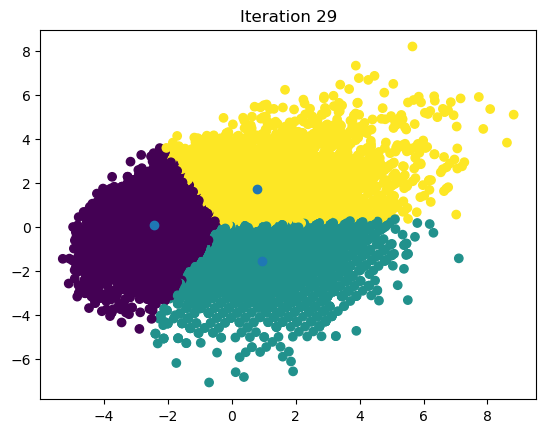

In [142]:
max_iterations = 100
centroid_count = 3 #chk cluter count 5  and more

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
#if you run again .each time it stops at different iteration.since cluster are formed randamly at initialized.so depending upon how  cluster start out,the 
#alogrithm would take  run time longer or lesser .

In [ ]:
#centroid_count = 5
#if we change cluster count 3 to 5 , it stop at the interation is 35

In [ ]:
#once the algorithm ends ,lets see centriods 

In [143]:
centroids

,0,1,2
overall,3.436536,5.200636,6.324628
potential,5.357557,4.894208,7.100439
wage_eur,1.031374,1.130961,1.456630
value_eur,1.029343,1.049892,1.311183
age,2.674807,5.963956,3.874397


In [147]:
labels.value_counts()

1    7188
0    6162
2    5815
dtype: int64

In [ ]:
#here we notice ,all values are sliently different

In [ ]:
#let confirm the hypothesis,by looking at players

In [144]:
players[labels==0][["short_name"]+ features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [ ]:
#cluster 0,age is low,potential is medium

In [145]:
players[labels==1][["short_name"]+ features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


In [ ]:
#cluster 1,age is high is low

In [146]:
players[labels==2][["short_name"]+ features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13267,K. Nagera,63,80,8000.0,1300000.0,19
13351,Llabrés,63,81,3000.0,1200000.0,19
14026,M. Azeez,62,83,4000.0,1300000.0,18
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [ ]:
#clusrter=3,age is medium,potential is high

In [ ]:
#after developing algorithm ,and getting value for each cluster
#next step is getting INTERPRET(k-means ,finding the pattern for your data)

In [ ]:
#next is: compare the  implementstion  that's in sklearn algorithm

In [149]:
from sklearn.cluster import KMeans

In [ ]:
#for intializing (here wemention no of cluster)
#call fit method

In [151]:
kmeans=KMeans(3)
kmeans.fit(data)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
#then to get centroids,we create dataframe,and specify the features,T-->for turn

In [152]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,3.887131,5.227438,6.810714
potential,5.670816,4.897025,7.250624
wage_eur,1.044292,1.126263,1.729856
value_eur,1.039689,1.044651,1.460033
age,2.903472,6.122894,4.481837


In [155]:
centroids

,0,1,2
overall,3.436536,5.200636,6.324628
potential,5.357557,4.894208,7.100439
wage_eur,1.031374,1.130961,1.456630
value_eur,1.029343,1.049892,1.311183
age,2.674807,5.963956,3.874397


In [ ]:
#compare our algorithm with sklearn
#clu=0 younger player
#clu=2 high potential (start)player
#clu =1 is older plyer

In [ ]:
#points:
#implementing our own kmeans cluster alogrithm-->learning(really know what situation can we apply).2-->gives more power and flexibility
#(ex:low memory or multiple machines)